In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**We are only working with petal length and petal width so drop other features**

In [4]:
iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
iris_df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


Text(0, 0.5, 'petal length (cm)')

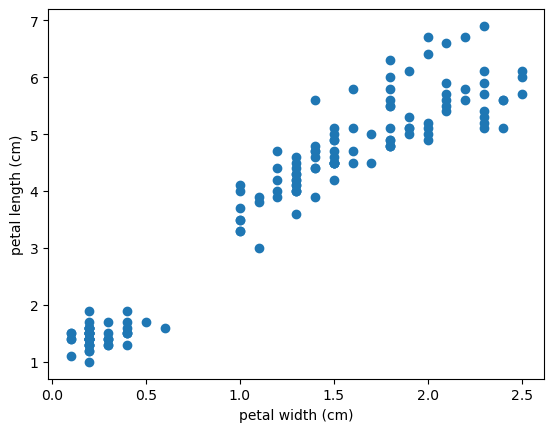

In [5]:
plt.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df[['petal width (cm)']])
iris_df['petal width (cm)'] = scaler.transform(iris_df[['petal width (cm)']])
iris_df

# scaler = MinMaxScaler()
# scaler.fit(iris_df[['petal length (cm)']])
# iris_df['petal length (cm)'] = scaler.transform(iris_df[['petal length (cm)']])
# iris_df

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


Text(0, 0.5, 'petal length (cm)')

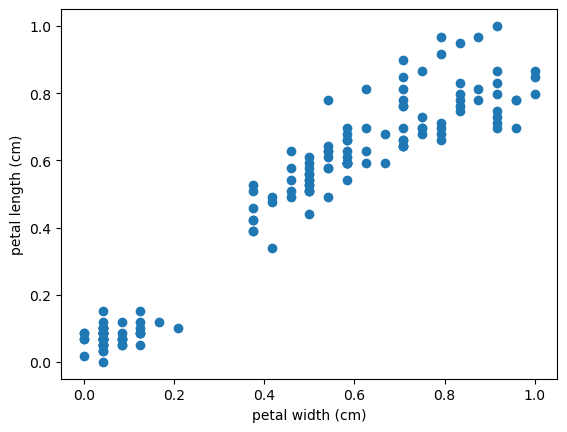

In [8]:
plt.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

## Now find the best K

In [9]:
from sklearn.cluster import KMeans
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667126,
 0.8535683225340072,
 0.6798101576314027,
 0.5658013138564928,
 0.48617893493425113,
 0.41363725779406146]

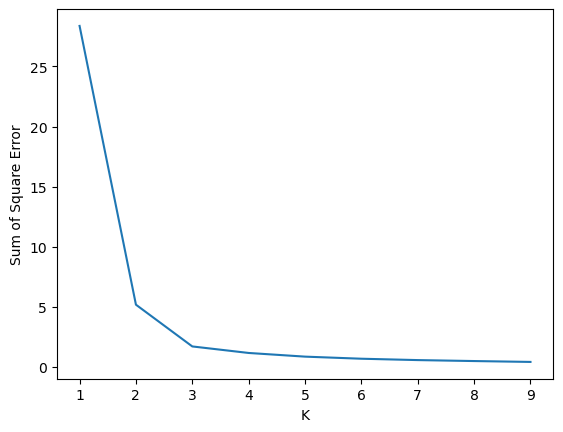

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)

## Now that we found what K should be find KMeans

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris_df[['petal width (cm)', 'petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris_df['cluster'] = y_predicted
iris_df.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [24]:
km.cluster_centers_

array([[0.51041667, 0.55867014],
       [0.06083333, 0.07830508],
       [0.81510417, 0.7740113 ]])

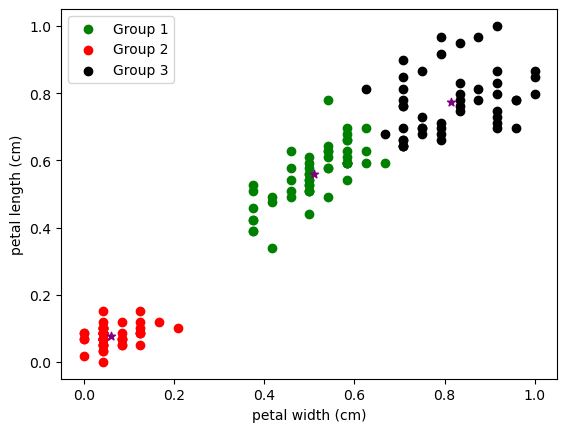

In [26]:
df1 = iris_df[iris_df['cluster'] == 0]
df2 = iris_df[iris_df['cluster'] == 1]
df3 = iris_df[iris_df['cluster'] == 2]
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], color='green')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], color='red')
plt.scatter(df3['petal width (cm)'], df3['petal length (cm)'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend(['Group 1', 'Group 2', 'Group 3'])